# 2333084 梁潇怡

In [728]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset 

In this assignment, I used the IRIS and WINE dataset from the UCI Machine Learning Repository.

### IRIS
According to the official introduction, the dataset includes 4 attributes and 3 labels.

Attribute Information:

1. Sepal length in cm
2. Sepal width in cm
3. Petal length in cm
4. Petal width in cm
5. class:
      --Iris Setosa
      --Iris Versicour
      --Iris Virginia

Due to the inclusion of three types of labels, in this assignment, one label was manually removed to match the binary dataset, and then the seanborn library was used to visualize the dataset to visually determine if there were any issues. 

According to the visualization image, we can see that there are some obvious outliers in the measurement that may be incorrect, such as sepal_width has one or two points deviate from normal values, which may affect training. At the same time, sepal_width is not as distinct as the other three attributes, so it is considered to remove this attribute in model training and prediction.

### WINE

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

The attributes are (dontated by Riccardo Leardi, riclea@anchem.unige.it )
1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash  
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10) Color intensity
11) Hue
12) OD280/OD315 of diluted wines
13) Proline 


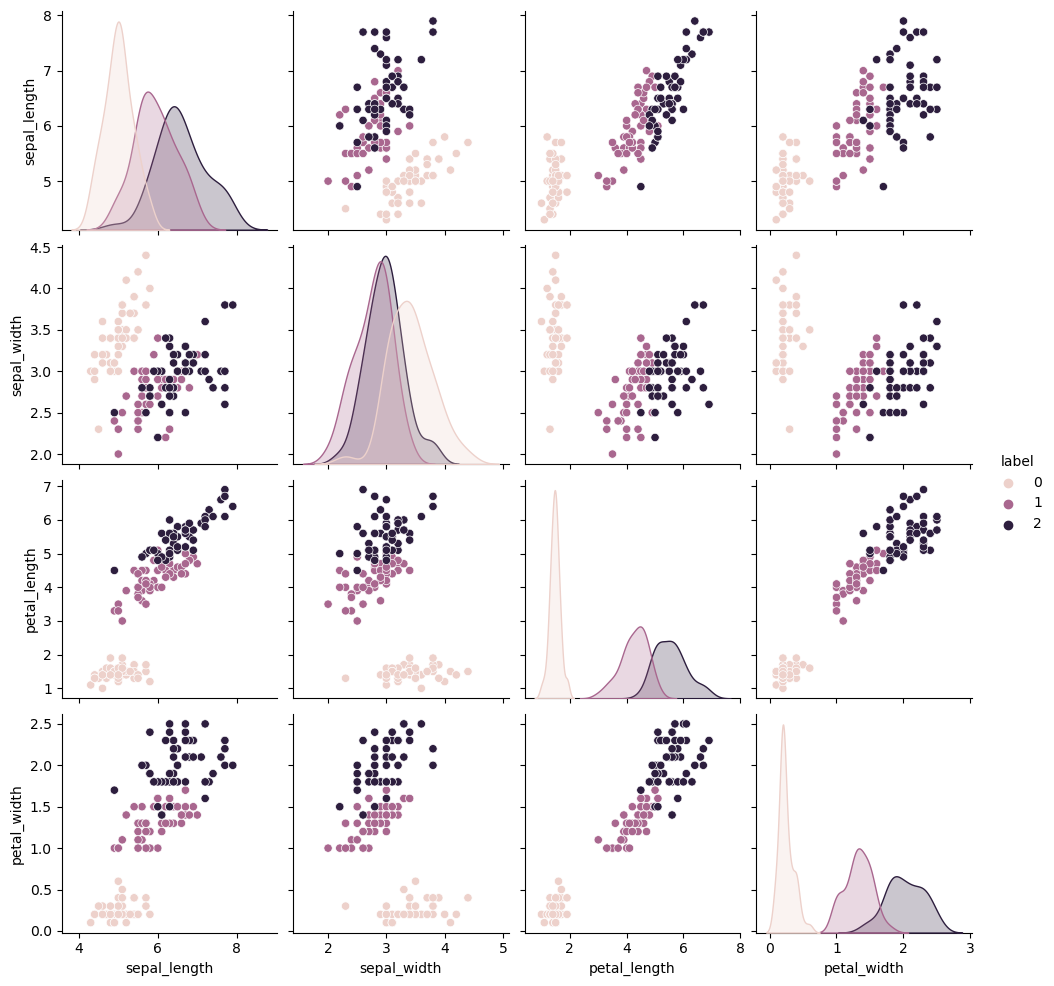

In [729]:
iris = pd.read_csv('./iris/iris.data',sep=',')
iris.columns=['sepal_length','sepal_width','petal_length','petal_width',"label"]
iris.label = pd.factorize(iris['label'])[0]
g=sns.pairplot(iris, hue='label')
plt.show()
iris = iris.to_numpy()
# iris = np.delete(iris,1,1)

In [730]:
# set seed
seed = 40
np.random.seed(seed)


## Model

In this assignment, a neural network was defined, including a two-layer fully connected layer, using ReLu and Sigmad as activation functions.


### FCLayer

A fully connected layer can be represented by the following formula:

$$
\boldsymbol{Y}=\boldsymbol{X} \boldsymbol{W}+\boldsymbol{b}
$$

Among them, $Y $output, $X $is input, $W $is weight matrix, and $b $is bias vector. Based on this formula, the ```forward``` function can be obtained.


Taking the partial derivative of the ```forward``` formula yields the following formula:


$$
\begin{cases}\nabla_{\boldsymbol{W}} L & =\boldsymbol{X}^{\mathrm{T}}\left(\nabla_{\boldsymbol{Y}} L\right) \\ \nabla_{\boldsymbol{b}} L & =(\mathbf{1})\left(\nabla_{\boldsymbol{Y}} L\right) \\ \nabla_{\boldsymbol{X}} L & =\left(\nabla_{\boldsymbol{Y}} L\right) \boldsymbol{W}^{\mathrm{T}}\end{cases}
$$

Among them, $\nabla_Y L$ represents ```grad```,  $\nabla_{\boldsymbol{X}} L$ represents the gradient obtained by backpropagation.


### ReLU

ReLu will cause the output of some neurons to be 0, resulting in sparsity of the network and reducing the interdependence of parameters, alleviating the occurrence of overfitting problems. Therefore, ReLU is used as the activation function in this model.


ReLU's mathematical formula is as follows:



$$
y=\max \{0, x\}
$$

After taking its derivative, we obtain:


$$
\operatorname{ReLU}^{\prime}(x)=\left\{\begin{array}{l}
0, x<0 \\
1, x \geqslant 0
\end{array}\right.
$$

$$
\nabla_{\boldsymbol{Y}} L=\left(\nabla_{\boldsymbol{X}} L\right) \operatorname{ReLU}^{\prime}(x)= \begin{cases}0, & x<0 \\ \nabla_{\boldsymbol{X}} L, & x \geqslant 0\end{cases}
$$

### Softmax

A commonly used method for multi classification problems is the Softmax function, which can predict the probability of each category. The formula for Softmax is as follows:

$$
\hat{\boldsymbol{Y}}=\frac{\exp [\boldsymbol{X}(i, j)]}{\sum_j \exp [\boldsymbol{X}(i, j)]}
$$


In [731]:
class FCLayer():
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.weight = np.random.normal(size=(self.input_dim, self.output_dim))
        self.bias = np.zeros([1, output_dim])

        self.grad_w = np.zeros((input_dim, output_dim))
        self.grad_b = np.zeros((1, output_dim))
    
    def forward(self, x):
        self.x = x
        return np.matmul(x, self.weight) + self.bias
    
    def backward(self, grad):
        self.grad_w = np.matmul(self.x.T, grad)      
        self.grad_b = np.sum(grad, axis=0)
        return np.matmul(grad, self.weight.T)
    
    def update(self, lr):
        self.weight = self.weight - lr * self.grad_w
        self.bias = self.bias - lr * self.grad_b

class Relu():
    def __init__(self) -> None:
        pass

    def forward(self, x):
        self.x = x
        return np.maximum(0, x)
    
    def backward(self, grad):
        grad[self.x<0] = 0
        return grad
    
class Softmax():
    def __init__(self):
        self.x = None

    def forward(self, x):
        x_max = np.max(x, axis=1, keepdims=True)
        x_exp = np.exp(x - x_max)
        prob = x_exp / np.sum(x_exp, axis=1, keepdims=True)
        self.x = x
        return prob
    
    def backward(self, grad):
        return grad
    

In [732]:
class IRIS():
    def __init__(self, lr, input_dim, output_dim, hidden_dim) -> None:
        self.layer1 = FCLayer(input_dim, hidden_dim)
        self.layer2 = FCLayer(hidden_dim, output_dim)
        
        self.relu1 = Relu()
        self.softmax = Softmax()
        self.lr = lr
    
    def forward(self, x):
        x = self.layer1.forward(x)
        x = self.relu1.forward(x)
        x = self.layer2.forward(x)
        x = self.softmax.forward(x)
        return x
    
    def backward(self, grad):
        grad = self.softmax.backward(grad)
        grad = self.layer2.backward(grad)
        grad = self.relu1.backward(grad)
        grad = self.layer1.backward(grad)

    def update(self):
        self.layer1.update(self.lr)
        self.layer2.update(self.lr)


## Train

### IRIS

In [733]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris[:,:4], iris[:,-1], test_size=0.1)


In [734]:
y_train_onehot = np.zeros((y_train.shape[0],3))
y_train_onehot[np.arange(y_train.shape[0]), y_train.astype(int)] = 1


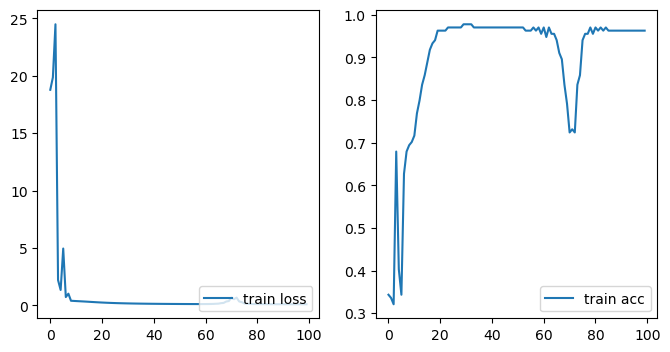

Test ACC: 1.0


In [735]:
from sklearn import metrics

model = IRIS(0.001, x_train.shape[1], y_train_onehot.shape[1], 32)
epoch = 100

loss = []
acc = []
for _ in range(epoch):
    pro = model.forward(x_train)
    grad = (pro-y_train_onehot)

    model.backward(grad)
    model.update()
    loss.append(metrics.log_loss(y_train,pro))
    acc.append(metrics.accuracy_score(y_true=y_train, y_pred=np.argmax(pro, axis=1)))

plt.figure(figsize=(8, 4))

plt.subplot(1,2, 1)
plt.plot(range(len(loss)),loss, label="train loss")
plt.legend(loc=4)

plt.subplot(1,2, 2)
plt.plot(range(len(acc)),acc, label="train acc")
plt.legend(loc=4)
plt.show()

y_predict = model.forward(x_test)
y_predict = np.argmax(y_predict, axis=1)
acc = metrics.accuracy_score(y_true=y_test, y_pred=y_predict)

print("Test ACC: {0}".format(acc))




### WINE

In [736]:
wine = pd.read_csv('./wine/wine.data',sep=',')
wine = wine.to_numpy()

In [737]:
class WINE():
    def __init__(self, lr, input_dim, output_dim, hidden_dim) -> None:
        self.layer1 = FCLayer(input_dim, hidden_dim)
        self.layer2 = FCLayer(hidden_dim, hidden_dim)
        self.layer3 = FCLayer(hidden_dim, output_dim)

        self.relu1 = Relu()
        self.relu2 = Relu()

        self.softmax = Softmax()
        self.lr = lr
    
    def forward(self, x):
        x = self.layer1.forward(x)
        x = self.relu1.forward(x)
        x = self.layer2.forward(x)
        x = self.relu2.forward(x)
        x = self.layer3.forward(x)
        x = self.softmax.forward(x)
        return x
    
    def backward(self, grad):
        grad = self.softmax.backward(grad)
        grad = self.layer3.backward(grad)
        grad = self.relu2.backward(grad)
        grad = self.layer2.backward(grad)
        grad = self.relu1.backward(grad)
        grad = self.layer1.backward(grad)

    def update(self):
        self.layer1.update(self.lr)
        self.layer2.update(self.lr)
        self.layer3.update(self.lr)


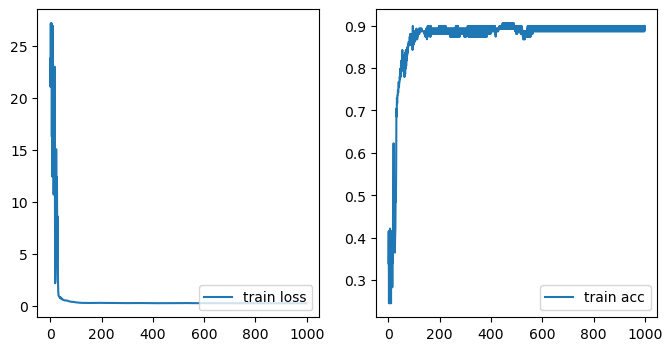

Test ACC: 1.0


In [738]:
x_train, x_test, y_train, y_test = train_test_split(wine[:,1:-1], wine[:,0], test_size=0.1)

y_train -= 1
y_test -=1
y_train_onehot = np.zeros((y_train.shape[0],3))
y_train_onehot[np.arange(y_train.shape[0]), y_train.astype(int)] = 1

model = WINE(0.001, x_train.shape[1], y_train_onehot.shape[1], 64)
epoch = 1000

loss = []
acc = []

for _ in range(epoch):
    pro = model.forward(x_train)
    grad = (pro-y_train_onehot) / len(x_train)

    model.backward(grad)
    model.update()
    loss.append(metrics.log_loss(y_train,pro))
    acc.append(metrics.accuracy_score(y_true=y_train, y_pred=np.argmax(pro, axis=1)))

plt.figure(figsize=(8, 4))
plt.subplot(1,2, 1)
plt.plot(range(len(loss)),loss, label="train loss")
plt.legend(loc=4)

plt.subplot(1,2, 2)
plt.plot(range(len(acc)),acc, label="train acc")
plt.legend(loc=4)
plt.show()


y_predict = model.forward(x_test)
y_predict = np.argmax(y_predict, axis=1)
acc = metrics.accuracy_score(y_true=y_test, y_pred=y_predict)

print("Test ACC: {0}".format(acc))


## Improvement
This hyper params should be defined carefully, can use grid search to find the best hyper params.

## How to Run
you need to prepare python enviroment and install:
- sklearn
- numpy
- matplotlib
- pandas
- seaborn
then click the run all.